In [1]:
# import packages
import joypy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from scipy.stats import norm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
# load data
## load radiative forcings
df_rf = pd.read_csv('../../data/climate/raw/radiative-forcings.csv', index_col=0)
## load temperatures
df_temp = pd.read_table('../../data/climate/raw/Complete_TAVG_daily.txt', sep=' ', header=None)
df_temp = df_temp[[2, 5, 6]]
df_temp = df_temp[df_temp[2] <= max(df_rf.index)]
df_temp.columns = ['YEAR', 'DAY', 'TEMP']

In [3]:
# create data lists
CO2_list = []
solar_list = []
vol_list = []
for i in range(df_temp.shape[0]):
    CO2_list.append(df_rf['CO2'][df_temp.iloc[i, 0]])
    solar_list.append(df_rf['Solar'][df_temp.iloc[i, 0]])
    vol_list.append(df_rf['Volcano'][df_temp.iloc[i, 0]])
df_temp['CO2'] = CO2_list
df_temp['Solar'] = solar_list
df_temp['Volcano'] = vol_list

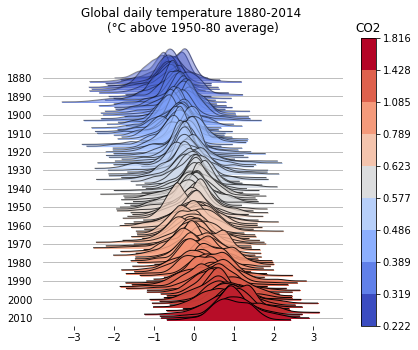

In [4]:
# CO2
labels=[y if y%10==0 else None for y in np.sort(df_temp.YEAR.unique())]
cm_raw = cm.get_cmap('coolwarm', 512)
normalize = mcolors.Normalize(vmin=min(df_temp['CO2']), vmax=max(df_temp['CO2']))
ar = np.array(df_temp['CO2'])
ar_uniq = np.unique(ar)
ar_vec = np.array([np.where(ar_uniq == var)[0][0]+1 for var in ar]) / len(ar_uniq)

levels = np.percentile(df_temp['CO2'], np.linspace(0,100,10))
colormap =  ListedColormap(cm_raw(np.linspace(0, 1, 256)))
cmap = ListedColormap(cm_raw(ar_vec))
normalize = mcolors.BoundaryNorm(levels, 256)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(df_temp['CO2'])    

fig, axes = joypy.joyplot(df_temp, by="YEAR", column="TEMP", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                            title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)", colormap = cmap)


cb = fig.colorbar(scalarmappaple, ax=axes)
cb.ax.set_title('CO2')
plt.savefig('../../output/Fig_1_CO2.pdf', bbox_inches='tight')  
plt.show()

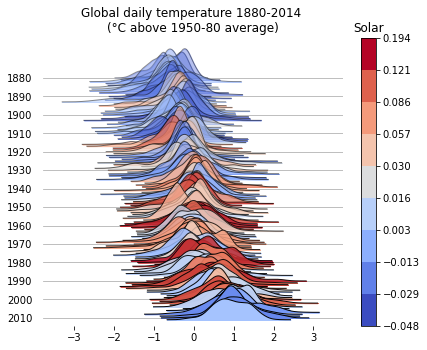

In [5]:
# Solar
cm_raw = cm.get_cmap('coolwarm', 512)

normalize = mcolors.Normalize(vmin=min(df_temp['Solar']), vmax=max(df_temp['Solar']))
ar = np.array(df_temp['Solar'])
ar_uniq = np.unique(ar)
ar_vec = np.array([np.where(ar_uniq == var)[0][0]+1 for var in ar]) / len(ar_uniq)

levels = np.percentile(df_temp['Solar'], np.linspace(0,100,10))
colormap =  ListedColormap(cm_raw(np.linspace(0, 1, 256)))
cmap = ListedColormap(cm_raw(ar_vec))
normalize = mcolors.BoundaryNorm(levels, 256)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(df_temp['Solar'])    

fig, axes = joypy.joyplot(df_temp, by="YEAR", column="TEMP", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)", colormap = cmap)

cb = fig.colorbar(scalarmappaple, ax=axes)
cb.ax.set_title('Solar')
plt.savefig('../../output/Fig_1_Solar.pdf', bbox_inches='tight')  
plt.show()